# Analyzing My Spotify Data
Looking for patterns, recreating the year "Spotify Wrapped" metrics

Spotify Wrapped uses daa from January to October - my results will be different.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plays = pd.read_csv('final.csv')
plays.head()

,Unnamed: 0,acousticness,albumID,albumName,analysis_url,artistName,danceability,datetime,duration_ms,endTime,...,msPlayed,name,speechiness,tempo,time_signature,trackName,track_href,type,uri,valence
0,0,0.26300,5M8U1qYKvRQHJJVHmPY7QD,Christmas Album,https://api.spotify.com/v1/audio-analysis/15sx...,The Jackson 5,0.583,2019-12-04 02:16:00,181267.0,2019-12-04 02:16,...,182293,I Saw Mommy Kissing Santa Claus___The Jackson 5,0.0538,128.897,4.0,I Saw Mommy Kissing Santa Claus,https://api.spotify.com/v1/tracks/15sxLiiChE5d...,audio_features,spotify:track:15sxLiiChE5dCW3Y756oas,0.614
1,1,0.03620,5eoDnNf0YWYPH9KmFnLyaM,Mannheim Steamroller Christmas Symphony II,https://api.spotify.com/v1/audio-analysis/2jLj...,Mannheim Steamroller,0.562,2019-12-04 02:18:00,236000.0,2019-12-04 02:18,...,109801,Carol of the Bells___Mannheim Steamroller,0.0284,94.109,3.0,Carol of the Bells,https://api.spotify.com/v1/tracks/2jLjMwY8thbm...,audio_features,spotify:track:2jLjMwY8thbmBhis9CsjFe,0.500
2,2,0.39200,3lajefIuUk4SfzqVBSJy8p,Good For You,https://api.spotify.com/v1/audio-analysis/4HW5...,Aminé,0.693,2019-12-04 02:22:00,173947.0,2019-12-04 02:22,...,23428,Spice Girl___Aminé,0.2260,78.090,4.0,Spice Girl,https://api.spotify.com/v1/tracks/4HW5kSQ8M2IQ...,audio_features,spotify:track:4HW5kSQ8M2IQWZhSxERvla,0.873
3,3,0.00293,5L8tVPZGpNSuPprmu7gqIR,Litmas,https://api.spotify.com/v1/audio-analysis/5sfo...,Shelley FKA DRAM,0.700,2019-12-04 02:22:00,188890.0,2019-12-04 02:22,...,188889,Litmas___Shelley FKA DRAM,0.0285,100.509,4.0,Litmas,https://api.spotify.com/v1/tracks/5sfoBZrl37SO...,audio_features,spotify:track:5sfoBZrl37SOhhIS0DMC5a,0.514
4,4,0.46400,25KYUrojMfQ12t7IRan2Vx,May I Have This Dance (Remix) [feat. Chance th...,https://api.spotify.com/v1/audio-analysis/0VaI...,Francis and the Lights,0.784,2019-12-04 02:25:00,195356.0,2019-12-04 02:25,...,172825,May I Have This Dance___Francis and the Lights,0.0647,90.033,4.0,May I Have This Dance,https://api.spotify.com/v1/tracks/0VaIsQoIQY10...,audio_features,spotify:track:0VaIsQoIQY10uxBrOyZ5cQ,0.865


In [4]:
# What is my time period
print("First date: ", plays['datetime'].min())
print("Last date: ", plays['datetime'].max())

First date:  2019-12-04 02:16:00
Last date:  2020-12-04 22:03:00


In [4]:
plays.columns

Index(['Unnamed: 0', 'acousticness', 'albumID', 'albumName', 'analysis_url',
       'artistName', 'danceability', 'datetime', 'duration_ms', 'endTime',
       'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'msPlayed', 'name', 'speechiness', 'tempo', 'time_signature',
       'trackName', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [4]:
# What is the date range of my data
plays['datetime'] = pd.to_datetime(plays['datetime'], format="%Y-%m-%d %H:%M:%S")

print('Includes all streaming between ', min(plays['datetime']), 'and', max(plays['datetime']))

Includes all streaming between  2019-12-04 02:16:00 and 2020-12-04 22:03:00


In [22]:
plays.loc[plays['trackName'] =='Adore You']

,Unnamed: 0,acousticness,albumID,albumName,analysis_url,artistName,danceability,datetime,duration_ms,endTime,...,msPlayed,name,speechiness,tempo,time_signature,trackName,track_href,type,uri,valence
141,141,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 13:45:00,207133.0,2019-12-06 13:45,...,11818,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
142,142,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 13:48:00,207133.0,2019-12-06 13:48,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
146,146,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 13:58:00,207133.0,2019-12-06 13:58,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
156,156,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 14:38:00,207133.0,2019-12-06 14:38,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
247,247,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 21:16:00,207133.0,2019-12-06 21:16,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
257,257,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 21:53:00,207133.0,2019-12-06 21:53,...,6478,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
258,258,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 21:53:00,207133.0,2019-12-06 21:53,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
261,261,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 22:02:00,207133.0,2019-12-06 22:02,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
265,265,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 22:12:00,207133.0,2019-12-06 22:12,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569
275,275,0.0237,7xV2TzoaVc0ycW7fwBwAml,Fine Line,https://api.spotify.com/v1/audio-analysis/3jju...,Harry Styles,0.676,2019-12-06 22:42:00,207133.0,2019-12-06 22:42,...,207133,Adore You___Harry Styles,0.0483,99.048,4.0,Adore You,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,audio_features,spotify:track:3jjujdWJ72nww5eGnfs2E7,0.569


In [5]:
# New Column with Track Name and Artist in case of duplicates
plays['Track_Artist'] = plays['trackName'] + "_" + plays['artistName']


In [6]:
# See my top songs
song_counts = plays[['Track_Artist', 'name']].groupby('Track_Artist').count()
song_counts.rename(columns={'name': 'Count'}, inplace=True)

top_songs = song_counts.sort_values('Count', ascending=False).head(20)
top_songs

,Count
Track_Artist,
Adore You_Harry Styles,95
Watermelon Sugar_Harry Styles,84
"10,000 Emerald Pools_BØRNS",64
Supalonely_BENEE,61
Golden_Harry Styles,60
"Sunflower, Vol. 6_Harry Styles",59
Canyon Moon_Harry Styles,58
Lights Up_Harry Styles,56
What A Man Gotta Do_Jonas Brothers,54


In [7]:
# See my top Artists
artist_counts = plays[['artistName', 'name']].groupby('artistName').count()

top_artists = artist_counts.sort_values('name', ascending=False).head(20)
top_artists

,name
artistName,
Harry Styles,584
Rainbow Kitten Surprise,319
Bad Bunny,282
Tame Impala,234
Shakira,198
Jonas Brothers,196
Dua Lipa,189
J Balvin,165
One Direction,162


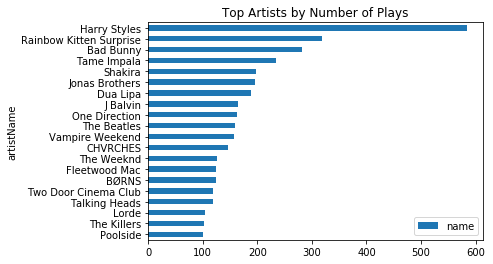

In [11]:
# Look at how many times I listened to my top artists
top_artists.sort_values('name').plot(kind='barh', title='Top Artists by Number of Plays')

plt.show()

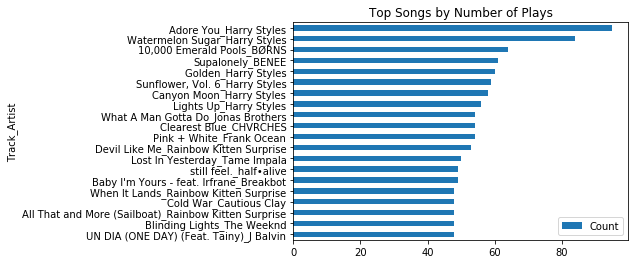

In [12]:
# Look at how many times I listened to my top songs
top_songs.sort_values('Count').plot(kind='barh', title='Top Songs by Number of Plays')

plt.show()

In [15]:
# How often do I listen to the whole song
plays['ListenedFull'] = np.where(plays['msPlayed']/ plays['duration_ms'] > 0.98, 'Full', plays['msPlayed']/ plays['duration_ms'])

plays[['Track_Artist', 'ListenedFull']].head()


,Track_Artist,ListenedFull
0,I Saw Mommy Kissing Santa Claus_The Jackson 5,Full
1,Carol of the Bells_Mannheim Steamroller,0.4652584745762712
2,Spice Girl_Aminé,0.134684702811776
3,Litmas_Shelley FKA DRAM,Full
4,May I Have This Dance_Francis and the Lights,0.8846669669731158


In [16]:
# See if top songs change if I only used songs I listened to all of
full_plays = plays[plays['ListenedFull'] == 'Full']


full_song_counts = full_plays[['Track_Artist', 'name']].groupby('Track_Artist').count()
full_song_counts.rename(columns={'name': 'FullCount'}, inplace=True)

full_top_songs = full_song_counts.sort_values('FullCount', ascending=False).head(20)
full_top_songs

,FullCount
Track_Artist,
Adore You_Harry Styles,82
Watermelon Sugar_Harry Styles,68
"10,000 Emerald Pools_BØRNS",54
Lights Up_Harry Styles,52
Canyon Moon_Harry Styles,51
Clearest Blue_CHVRCHES,51
Golden_Harry Styles,45
Lost In Yesterday_Tame Impala,44
"Sunflower, Vol. 6_Harry Styles",43


In [17]:
compare_tops = pd.concat([full_song_counts,song_counts], axis=1)
compare_tops.sort_values('FullCount', ascending=False, inplace=True)
compare_tops['SkipCount'] = compare_tops['Count'] - compare_tops['FullCount']

compare_tops.head(10)

,FullCount,Count,SkipCount
Adore You_Harry Styles,82.0,95,13.0
Watermelon Sugar_Harry Styles,68.0,84,16.0
"10,000 Emerald Pools_BØRNS",54.0,64,10.0
Lights Up_Harry Styles,52.0,56,4.0
Canyon Moon_Harry Styles,51.0,58,7.0
Clearest Blue_CHVRCHES,51.0,54,3.0
Golden_Harry Styles,45.0,60,15.0
Lost In Yesterday_Tame Impala,44.0,50,6.0
"Sunflower, Vol. 6_Harry Styles",43.0,59,16.0
When It Lands_Rainbow Kitten Surprise,43.0,48,5.0


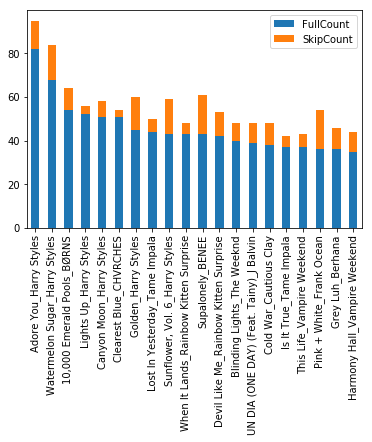

In [18]:
# Plot to show how often I skipp each song
compare_tops[['FullCount','SkipCount']].head(20).plot(kind='bar', stacked=True)

plt.show()

In [19]:
# See what songs I skipped most often
# Maybe I should take these off my playlists
skips = plays[plays['ListenedFull'] != 'Full']


skip_counts = skips[['Track_Artist', 'name']].groupby('Track_Artist').count()
skip_counts.rename(columns={'name': 'FullCount'}, inplace=True)

top_skips = skip_counts.sort_values('FullCount', ascending=False).head(20)
top_skips

,FullCount
Track_Artist,
Down And Out_The Griswolds,29
still feel._half•alive,23
Pa' Olvidarme De Ella_Piso 21,23
Electric Love_BØRNS,23
Mi Nuevo Vicio_Paulina Rubio,23
What A Man Gotta Do_Jonas Brothers,21
Con Calma_Daddy Yankee,21
Baby I'm Yours - feat. Irfrane_Breakbot,20
Roses - Imanbek Remix_SAINt JHN,19


In [20]:
# Are there any songs I have never skipped?
compare_tops[(compare_tops['SkipCount'] == 0) & (compare_tops['Count'] > 10)]

,FullCount,Count,SkipCount
Soliá_Bad Bunny,25.0,25,0.0
"King of the Lost Boys - From the Apple TV+ Original Series ""Little Voice""_Little Voice Cast",17.0,17,0.0
Whatever You Want_Kaptan,16.0,16,0.0
Rojo_J Balvin,14.0,14,0.0
Gris_J Balvin,14.0,14,0.0
Wait a Minute!_WILLOW,13.0,13,0.0
Holy (feat. Chance The Rapper)_Justin Bieber,13.0,13,0.0
4EVER_Clairo,13.0,13,0.0
Dirty Air_Two Door Cinema Club,13.0,13,0.0
Mala Fama_Danna Paola,12.0,12,0.0


In [21]:
# Are my top artists different if I only include sonds I didnt skip?
full_artist_counts = full_plays[['artistName', 'name']].groupby('artistName').count()
full_artist_counts.rename(columns={'name': 'FullCount'}, inplace=True)

artist_counts.rename(columns={'name': 'Count'}, inplace=True)

compare_top_artists = pd.concat([full_artist_counts,artist_counts], axis=1)
compare_top_artists.sort_values('FullCount', ascending=False, inplace=True)
compare_top_artists['SkipCount'] = compare_top_artists['Count'] - compare_top_artists['FullCount']

compare_top_artists.head(10)

,FullCount,Count,SkipCount
Harry Styles,454.0,584,130.0
Rainbow Kitten Surprise,257.0,319,62.0
Bad Bunny,207.0,282,75.0
Tame Impala,180.0,234,54.0
Dua Lipa,141.0,189,48.0
Jonas Brothers,132.0,196,64.0
J Balvin,131.0,165,34.0
Shakira,126.0,198,72.0
CHVRCHES,122.0,147,25.0
Vampire Weekend,120.0,157,37.0


In [22]:
# What artists do I skip the most?
compare_top_artists['PercentSkipped'] = (compare_top_artists['SkipCount'] / compare_top_artists['Count']) * 100 

compare_top_artists.sort_values('PercentSkipped', ascending=False).head(10)

,FullCount,Count,SkipCount,PercentSkipped
Selena,1.0,16,15.0,93.750000
Jawsh 685,1.0,13,12.0,92.307692
Beastie Boys,1.0,12,11.0,91.666667
Eminem,1.0,8,7.0,87.500000
Jack Harlow,2.0,15,13.0,86.666667
Justin Timberlake,6.0,36,30.0,83.333333
New Radicals,1.0,6,5.0,83.333333
Bryce Vine,1.0,6,5.0,83.333333
Lil Uzi Vert,2.0,11,9.0,81.818182
Future,4.0,21,17.0,80.952381


In [23]:
# Any artists I never skip?
compare_top_artists[compare_top_artists['FullCount'] > 50].sort_values('PercentSkipped').head(10)

,FullCount,Count,SkipCount,PercentSkipped
Fall Out Boy,65.0,75,10.0,13.333333
Talking Heads,100.0,118,18.0,15.254237
CHVRCHES,122.0,147,25.0,17.006803
Rainbow Kitten Surprise,257.0,319,62.0,19.435737
Two Door Cinema Club,95.0,119,24.0,20.168067
J Balvin,131.0,165,34.0,20.606061
Lorde,81.0,104,23.0,22.115385
Harry Styles,454.0,584,130.0,22.260274
Paramore,54.0,70,16.0,22.857143
Tame Impala,180.0,234,54.0,23.076923


In [24]:
# See what songs I listened to that are not 4/4
plays[plays['time_signature'] != 3.0].groupby('Track_Artist').count()

,Unnamed: 0,acousticness,albumID,albumName,analysis_url,artistName,danceability,datetime,duration_ms,endTime,...,name,speechiness,tempo,time_signature,trackName,track_href,type,uri,valence,ListenedFull
Track_Artist,,,,,,,,,,,,,,,,,,,,,
#14 - The Knowledge _tldr_podcast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
#15 - Internet Time _tldr_podcast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
#2 - Stereotyped _tldr_podcast,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
#2 A Nightmare on Elm Street_The Scaredy Cats Horror Show,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
#3 Alien_The Scaredy Cats Horror Show,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
#4 - The Unicorn _tldr_podcast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
#5 Get Out_The Scaredy Cats Horror Show,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
#6 - Ghost Town _tldr_podcast,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
#GETITRIGHT_Miley Cyrus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [116]:
plays.groupby('time_signature').count()

,Unnamed: 0,acousticness,albumID,albumName,analysis_url,artistName,danceability,datetime,duration_ms,endTime,...,tempo,trackName,track_href,type,uri,valence,Track_Artist,ListenedFull,duration_s,sPlayed
time_signature,,,,,,,,,,,,,,,,,,,,,
1.0,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
3.0,695,695,695,695,695,695,695,695,695,695,...,695,695,695,695,695,695,695,695,695,695
4.0,15596,15596,15596,15596,15596,15596,15596,15596,15596,15596,...,15596,15596,15596,15596,15596,15596,15596,15596,15596,15596
5.0,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122


In [7]:
# How to split podcasts out?
# From Spotify Docs: Values above 0.66 describe tracks that are probably made entirely of spoken words.
plays[plays['speechiness'] > 0.66].groupby('artistName').count()

,Unnamed: 0,acousticness,albumID,albumName,analysis_url,danceability,datetime,duration_ms,endTime,energy,...,msPlayed,name,speechiness,tempo,time_signature,trackName,track_href,type,uri,valence
artistName,,,,,,,,,,,,,,,,,,,,,
Chloe x Halle,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Ear Hustle,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Emily Krueger,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Huey Mack,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Marcaux,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Reply All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Richard Pryor,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
The Beatles,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
You're Wrong About,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [29]:
# There are a lot of podcasts with lower "speechiness" 
plays[(plays['artistName'] == "You're Wrong About") & (plays['speechiness'] < 0.66)][['speechiness','trackName','uri']]

,speechiness,trackName,uri
15819,0.1170,The Satanic Panic,spotify:track:0ystoyJ1kYTxHks2uGBxcM
15820,0.4020,Going Postal,spotify:track:4xlp3JUbjH5nm78D9CAx3i
15821,0.1450,The Electoral College,spotify:track:01NIn6b6VwsjO1p5QmcmeC
15822,0.4020,Going Postal,spotify:track:4xlp3JUbjH5nm78D9CAx3i
15823,0.1450,The Electoral College,spotify:track:01NIn6b6VwsjO1p5QmcmeC
15824,0.4370,Crack Babies,spotify:track:4eLgxsUXPAr1o5tSRuUMe3
15825,0.1450,The Electoral College,spotify:track:01NIn6b6VwsjO1p5QmcmeC
15826,0.0328,Afterschool Specials,spotify:track:3vYrJ1NxDQqo3q5O6nvEth
15827,0.1400,Stockholm Syndrome,spotify:track:6AzCBeiDuUXGXjznBufswB
15828,0.0401,Matthew Shepard,spotify:track:55dyNpMjjPrYNgFc13kUqQ


In [22]:
# Save my podcast data for separate analysis
# Using manual list because I haven't been able to split based on the data
podcasts = ["You're Wrong About", 'Ear Hustle', 'Reply All','tldr_podcast', 'Crime Junkie', 'The Nod', 
            'This Podcast Will Kill You', "It's Been a Minute With Sam Sanders", 'Spirits','CounterClock' ,
           'Criminal', 'Resistance', 'The Scaredy Cats Horror Show', 'Swindled']

podcast_plays = plays[plays['artistName'].isin(podcasts)]
podcast_plays.groupby('artistName')['speechiness'].mean()

artistName
CounterClock                    0.105580
Crime Junkie                    0.373000
Ear Hustle                      0.235372
Reply All                       0.578000
Resistance                      0.200375
Spirits                         0.036600
The Nod                         0.108120
The Scaredy Cats Horror Show    0.049817
You're Wrong About              0.155229
tldr_podcast                    0.190357
Name: speechiness, dtype: float64